In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from keras.optimizers import Adam, SGD

In [ ]:
data_dir = "../input/cs412-spring-2021/train_data/train/"

In [ ]:
batch_size = 512
img_height = 64
img_width = 64

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 29000 files belonging to 29 classes.
Using 23200 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory( 
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 29000 files belonging to 29 classes.
Using 5800 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

In [ ]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
IMG_SIZE = (64, 64)
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary() 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 32, 32, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 32, 32, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 32, 32, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
model = tf.keras.Sequential([
  normalization_layer,
  base_model,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(29, activation='softmax')
])

In [ ]:
model.build(input_shape=(None,64, 64, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 5120)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               655488    
_________________________________________________________________
dense_3 (Dense)              (None, 29)                3741      
Total params: 2,917,213
Trainable params: 659,229
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer='adam', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

In [ ]:
history= model.fit(train_ds, batch_size=128,
                   epochs=20, validation_data=val_ds, 
                   callbacks=[es])

Epoch 1/20
46/46 [==============================] - 26s 463ms/step - loss: 1.9049 - accuracy: 0.4899 - val_loss: 0.4256 - val_accuracy: 0.8828
Epoch 2/20
46/46 [==============================] - 3s 60ms/step - loss: 0.3245 - accuracy: 0.9126 - val_loss: 0.2403 - val_accuracy: 0.9333
Epoch 3/20
46/46 [==============================] - 3s 58ms/step - loss: 0.1660 - accuracy: 0.9619 - val_loss: 0.1725 - val_accuracy: 0.9550
Epoch 4/20
46/46 [==============================] - 3s 58ms/step - loss: 0.1072 - accuracy: 0.9785 - val_loss: 0.1439 - val_accuracy: 0.9626
Epoch 5/20
46/46 [==============================] - 3s 58ms/step - loss: 0.0744 - accuracy: 0.9864 - val_loss: 0.1197 - val_accuracy: 0.9679
Epoch 6/20
46/46 [==============================] - 3s 59ms/step - loss: 0.0524 - accuracy: 0.9920 - val_loss: 0.1047 - val_accuracy: 0.9716
Epoch 7/20
46/46 [==============================] - 3s 58ms/step - loss: 0.0392 - accuracy: 0.9954 - val_loss: 0.0898 - val_accuracy: 0.9750
Epoch 8/20


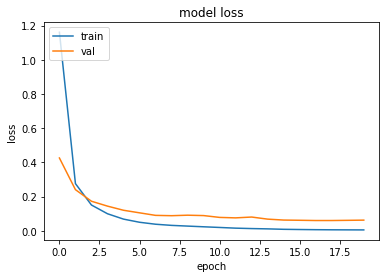

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#data_dir = "../input/cs412-spring-2021/test_data"
test_dataset= image_dataset_from_directory('../input/cs412-spring-2021',
                                                  batch_size=14501,
                                                  image_size=(64,64),shuffle=False)


Found 50750 files belonging to 3 classes.


In [ ]:
"""class_names = test_dataset.class_names
print(class_names)"""
file_paths = test_dataset.file_paths
for a in range(0,len(file_paths)):
    file_paths[a]=int(file_paths[a][file_paths[a].rfind('/')+1: file_paths[a].rfind('.')] )
file_paths

[0,
 1,
 10,
 100,
 1000,
 10000,
 10001,
 10002,
 10003,
 10004,
 10005,
 10006,
 10007,
 10008,
 10009,
 1001,
 10010,
 10011,
 10012,
 10013,
 10014,
 10015,
 10016,
 10017,
 10018,
 10019,
 1002,
 10020,
 10021,
 10022,
 10023,
 10024,
 10025,
 10026,
 10027,
 10028,
 10029,
 1003,
 10030,
 10031,
 10032,
 10033,
 10034,
 10035,
 10036,
 10037,
 10038,
 10039,
 1004,
 10040,
 10041,
 10042,
 10043,
 10044,
 10045,
 10046,
 10047,
 10048,
 10049,
 1005,
 10050,
 10051,
 10052,
 10053,
 10054,
 10055,
 10056,
 10057,
 10058,
 10059,
 1006,
 10060,
 10061,
 10062,
 10063,
 10064,
 10065,
 10066,
 10067,
 10068,
 10069,
 1007,
 10070,
 10071,
 10072,
 10073,
 10074,
 10075,
 10076,
 10077,
 10078,
 10079,
 1008,
 10080,
 10081,
 10082,
 10083,
 10084,
 10085,
 10086,
 10087,
 10088,
 10089,
 1009,
 10090,
 10091,
 10092,
 10093,
 10094,
 10095,
 10096,
 10097,
 10098,
 10099,
 101,
 1010,
 10100,
 10101,
 10102,
 10103,
 10104,
 10105,
 10106,
 10107,
 10108,
 10109,
 1011,
 10110,
 10

In [ ]:
#list(test_dataset.as_numpy_iterator())
import tensorflow_datasets as tfds
x=tfds.as_numpy(test_dataset)


In [ ]:
arr = next(x, None)

In [ ]:
len(arr[0])
n=arr[0]
n

array([[[[1.61328125e+00, 1.17578125e+00, 2.16855469e+02],
         [1.17656250e+01, 1.18281250e+01, 1.84929688e+02],
         [1.97851562e+01, 1.71796875e+01, 1.81890625e+02],
         ...,
         [1.01679688e+01, 6.02343750e+00, 1.80000000e+02],
         [9.88281250e+00, 4.57031250e+00, 1.77417969e+02],
         [1.51132812e+01, 1.24335938e+01, 2.12906250e+02]],

        [[1.13398438e+01, 1.17382812e+01, 1.79226562e+02],
         [1.09203125e+02, 1.02417969e+02, 7.58906250e+01],
         [1.14015625e+02, 9.82695312e+01, 6.18828125e+01],
         ...,
         [8.81523438e+01, 7.55273438e+01, 5.83398438e+01],
         [1.29941406e+02, 1.16449219e+02, 1.09914062e+02],
         [1.17664062e+02, 1.13449219e+02, 1.85449219e+02]],

        [[9.75000000e+00, 1.25429688e+01, 1.83964844e+02],
         [9.29492188e+01, 8.41992188e+01, 6.63789062e+01],
         [9.22304688e+01, 7.78632812e+01, 6.11796875e+01],
         ...,
         [1.30179688e+02, 1.25992188e+02, 1.17054688e+02],
         [

In [ ]:
y_pred = model.predict(n)
y_pred2 = np.argmax(y_pred, axis = 1)
print(y_pred.shape, y_pred2.shape) 

(14501, 29) (14501,)


In [ ]:
y_pred

array([[2.9890910e-07, 6.1624348e-08, 7.1695773e-08, ..., 1.1449782e-08,
        5.9476082e-07, 8.8824024e-09],
       [1.9557378e-07, 1.4186411e-17, 5.6746860e-14, ..., 1.4906663e-14,
        3.9034065e-16, 1.3106983e-07],
       [1.0686789e-13, 8.4201934e-12, 5.4338465e-14, ..., 1.0624204e-11,
        1.3312252e-14, 1.5398131e-10],
       ...,
       [4.1609990e-15, 2.5479713e-08, 1.0222285e-11, ..., 8.1159468e-11,
        5.4737942e-13, 1.0117356e-09],
       [3.6546342e-07, 5.4657029e-08, 4.4615356e-13, ..., 4.9627252e-10,
        1.9129086e-12, 4.1957343e-10],
       [1.9847110e-07, 1.6687977e-06, 3.2179155e-08, ..., 6.8041368e-07,
        5.4624104e-07, 3.0917947e-03]], dtype=float32)

In [ ]:
y_pred2

array([ 9, 22,  5, ..., 17, 22, 21])

In [ ]:
letters=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

In [ ]:
len(y_pred2)
letter_pred=[]

In [ ]:
for x in range(0,len(y_pred2)):
    letter_pred.append(letters[y_pred2[x]])

In [ ]:
import numpy as np
import pandas as pd

d = {'Id':file_paths[:14501],'Prediction':letter_pred}
#d=d.sort_values(by="Id")
prediction = pd.DataFrame(d)
prediction=prediction.sort_values(by="Id")

In [ ]:
df = prediction.iloc[1: , :]

In [ ]:
df.head()

,Id,Prediction
14500,0,V
1,1,W
5612,2,J
6723,3,M
7834,4,M


In [ ]:
df.to_csv("submission.csv",index=False)